In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
# Load the data
df = pd.read_csv('./data/data.csv', sep=';')
df.head()

,timestamp,V005_vent01_CO2,V022_vent02_CO2,V006_vent01_temp_out,V023_vent02_temp_out
0,23.06.2012 01:00,494.172532,405.514287,22.700000,23.449972
1,23.06.2012 02:00,491.992574,404.705170,22.700000,23.400000
2,23.06.2012 03:00,490.003467,401.981443,22.628444,23.400000
3,23.06.2012 04:00,490.972327,402.471192,22.600000,23.400000
4,23.06.2012 05:00,489.132106,403.174487,22.600000,23.349972


In [4]:
# Creating a DataFrame
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d.%m.%Y %H:%M')

# Extracting the hour from the timestamp
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].apply(lambda x: str(x).split(' ')[0])

# Melting the DataFrame for seaborn boxplot
df_melted = pd.melt(df, id_vars=['hour'], value_vars=['V005_vent01_CO2', 'V022_vent02_CO2', 'V006_vent01_temp_out', 'V023_vent02_temp_out'])


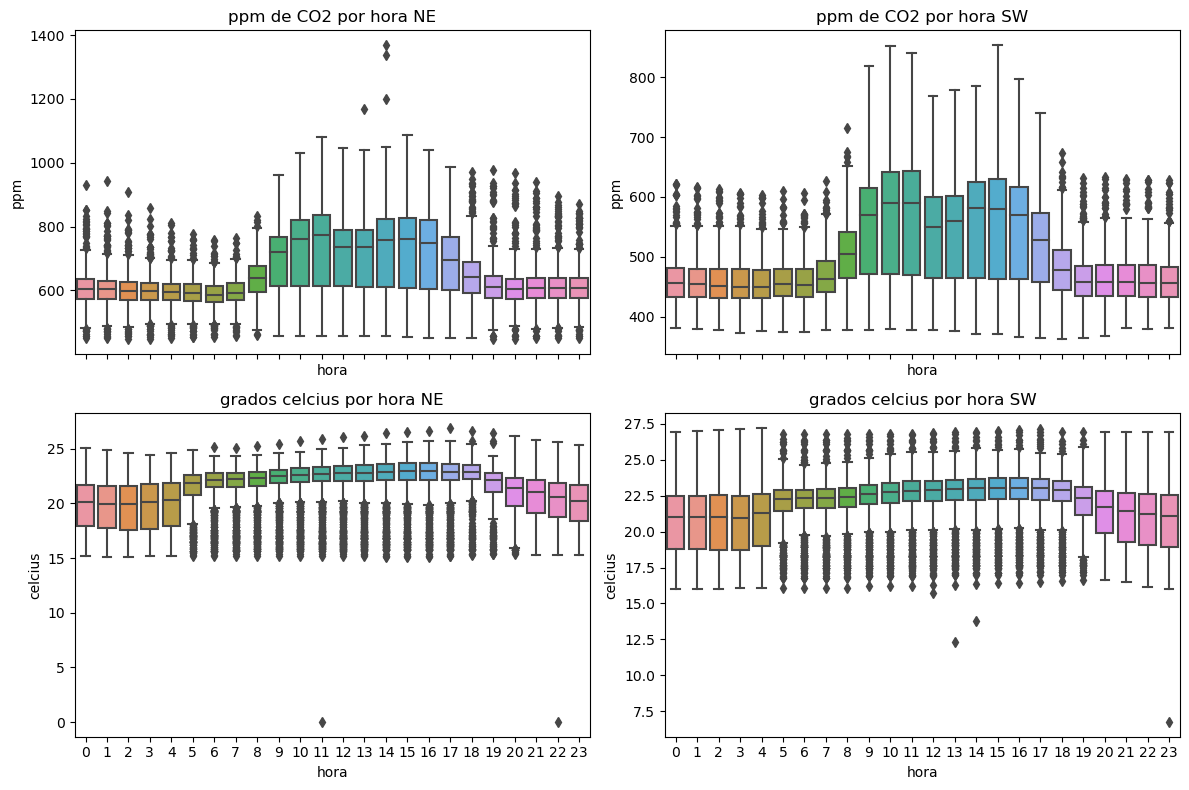

In [5]:
# Create the box plot
#timestamp;V005_vent01_CO2;V022_vent02_CO2;V006_vent01_temp_out;V023_vent02_temp_out
top_variables = ['V005_vent01_CO2', 'V022_vent02_CO2']
bottom_variables = ['V006_vent01_temp_out', 'V023_vent02_temp_out']
directions = ['NE', 'SW']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)

for i, variable in enumerate(top_variables):
    sns.boxplot(x='hour', y=variable, data=df, ax=axes[0][i])
    axes[0][i].set_title(f'ppm de CO2 por hora {directions[i]}')
    axes[0][i].set_ylabel('ppm')
    axes[0][i].set_xlabel('hora')

for i, variable in enumerate(bottom_variables):
    sns.boxplot(x='hour', y=variable, data=df, ax=axes[1][i])
    axes[1][i].set_title(f'grados celcius por hora {directions[i]}')
    axes[1][i].set_ylabel('celcius')
    axes[1][i].set_xlabel('hora')

# Adjust layout
plt.tight_layout()
plt.show()

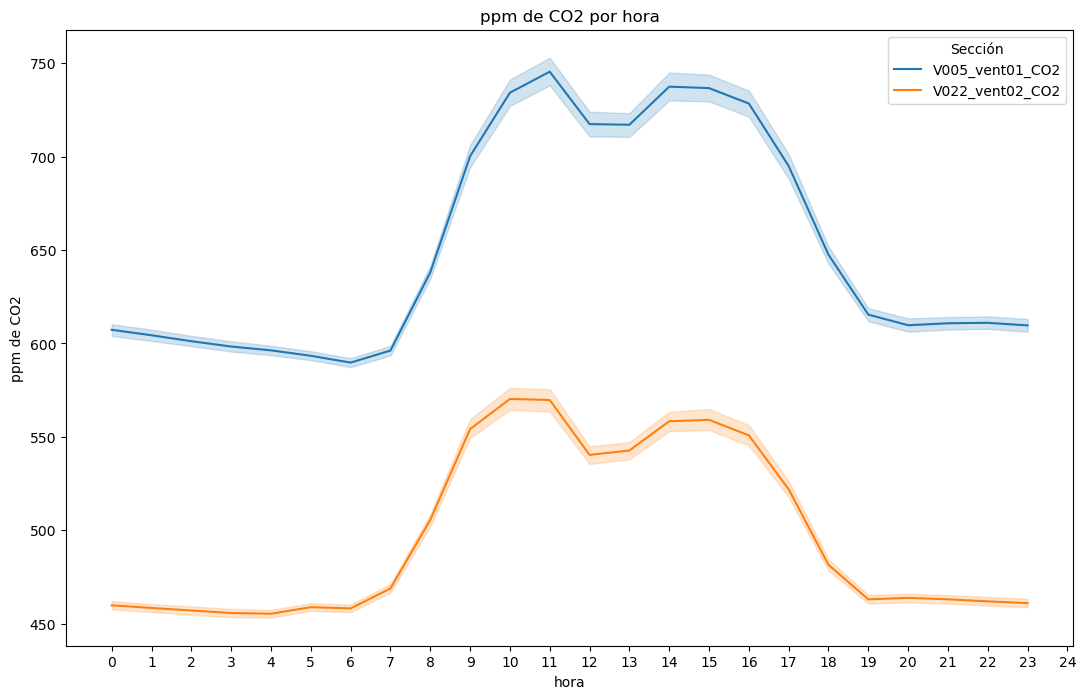

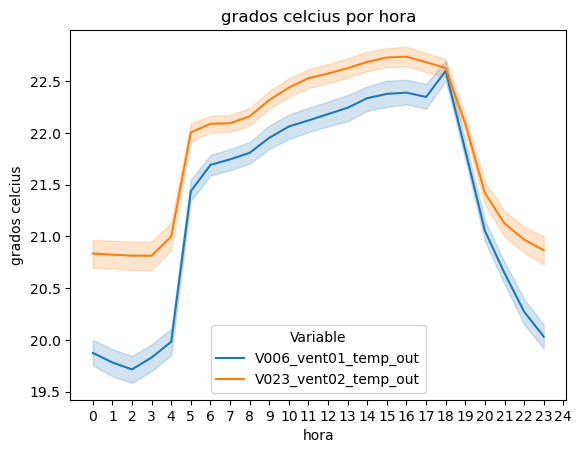

In [6]:
vent_variables = ['V005_vent01_CO2', 'V022_vent02_CO2']
temp_variables = ['V006_vent01_temp_out', 'V023_vent02_temp_out']
plt.figure(figsize=(13, 8))

for variable in vent_variables:
    sns.lineplot(x='hour', y=variable, data=df, label=variable)

plt.title('ppm de CO2 por hora')
plt.xlabel('hora')
plt.ylabel('ppm de CO2')
plt.legend(title='Sección')
plt.xticks(np.arange(0, 25, 1))
plt.show()

for variable in temp_variables:
    sns.lineplot(x='hour', y=variable, data=df, label=variable)

plt.title('grados celcius por hora')
plt.xlabel('hora')
plt.ylabel('grados celcius')
plt.legend(title='Variable')
plt.xticks(np.arange(0, 25, 1))
plt.show()

In [7]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

tsne_dimension_reduced_values = []
# variables = ['V005_vent01_CO2', 'V022_vent02_CO2', 'V006_vent01_temp_out', 'V023_vent02_temp_out']
variables = ['V005_vent01_CO2']

df_grouped_by_day = []

for variable in variables:
    df_grouped_by_day.append(df[[variable, 'hour', 'day']].pivot_table(values=variable, columns='hour', index='day', fill_value=0))


# display(df[['V005_vent01_CO2', 'hour', 'day']])
# print(testing)
# print(f'df shape {df.shape}')
# print(f'shape {testing.shape}')
for i in range(len(variables)):
    # display(df_grouped_by_day[i])
    # tsne = TSNE(n_components=1, random_state=1)
    # tsne = TSNE(n_components=2, random_state=1)
    tsne = PCA(n_components=2, random_state=1)
    tsne_dimension_reduced_values.append(tsne.fit_transform(df_grouped_by_day[i]))
    # print(f'{variables[i]} divergence: {tsne.kl_divergence_}')
    print(f'{variables[i]} divergence: {tsne.mean_}')

V005_vent01_CO2 divergence: [606.76490523 604.38350847 601.19827946 598.35437354 596.30816055
 592.84683976 589.74965955 596.20027886 638.03095059 700.30636423
 734.29105196 745.54887781 717.48450367 717.13201912 737.53891361
 736.75609946 728.50025698 695.00908792 647.50639016 615.45198542
 609.75508107 610.80982737 611.0659464  609.66259168]


In [8]:
import plotly.express as px

for i in range(len(variables)):
    print(len(tsne_dimension_reduced_values[i][:, 0]))
    # fig = px.scatter(x=tsne_dimension_reduced_values[i][:, 0], y=[0] * len(tsne_dimension_reduced_values[i][:, 0]), title=f'{variables[i]} t-SNE')
    fig = px.scatter(x=tsne_dimension_reduced_values[i][:, 0], y=tsne_dimension_reduced_values[i][:, 1], title=f'{variables[i]} t-SNE')
    fig.show()


1081


---- variable V005_vent01_CO2 ----
KMEANS
score by k: [0.6421067032008176, 0.6039520846039512, 0.5591869388536967, 0.51354309572134, 0.5127559912498599, 0.521553632463212]
kmeans max score with 2 k


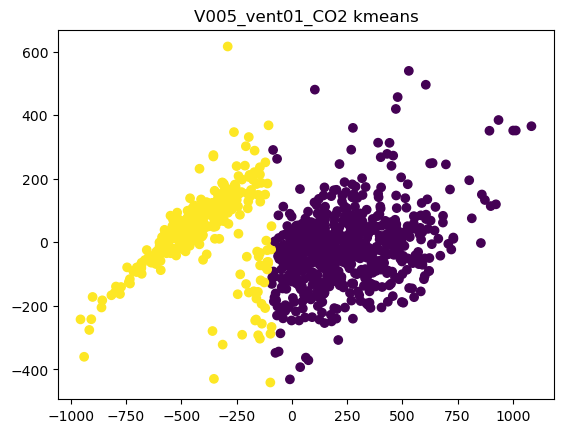

AGLOMERATIVO JERARQUICO
score by k: [0.6120671453299201, 0.5082058123921899, 0.516893601799673, 0.4883848202608999, 0.47027447985583415, 0.41361120523925066]
agglomerative score max score with 2 k


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
2012-06-23,0.000000,494.172532,491.992574,490.003467,490.972327,489.132106,486.137589,483.066523,481.460670,480.140102,...,466.618952,465.630422,463.922876,462.538243,460.332769,458.816014,457.837651,457.689906,458.449267,458.652779
2012-06-24,458.824548,457.535115,457.309014,459.985526,461.653052,461.566867,464.418537,469.644740,476.000920,479.572858,...,470.332821,466.906514,464.612899,461.566695,449.625774,448.086428,448.670414,449.724209,449.625429,450.851575
2012-06-25,450.872088,450.907759,448.446673,448.399006,450.684810,454.673054,461.562623,472.276696,522.675604,610.941931,...,687.875395,704.036544,635.936475,564.536226,517.268232,493.739050,488.077012,492.304807,494.346951,496.490639
2012-06-26,496.571042,495.621119,496.308779,492.603634,493.795365,485.734315,491.470150,495.536736,550.268345,662.186574,...,712.976745,728.194034,686.208859,607.720397,533.301059,501.010437,495.971646,496.705753,501.579189,500.557747
2012-06-27,501.765718,503.314852,498.245655,499.077959,498.698258,481.015510,483.445859,498.477055,573.783741,697.032351,...,756.646348,792.393147,798.540879,723.010780,589.715377,534.702505,527.679385,526.832513,526.849100,521.171202


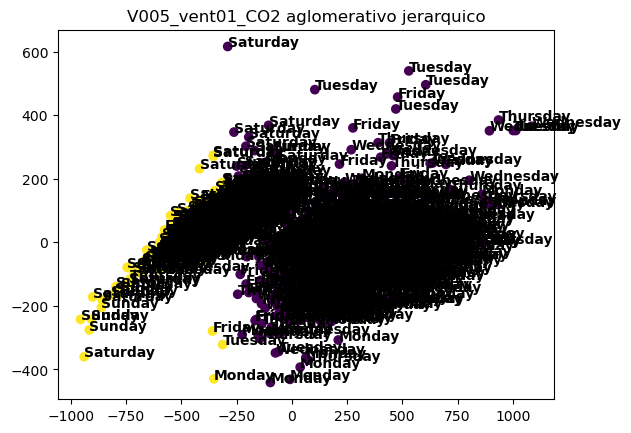

In [38]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from datetime import datetime

K = range(2, 8)
kmeans_fits = []
agglomerative_fits = []
kmeans_score = []
agglomerative_score = []

for i in range(len(variables)):
    data = tsne_dimension_reduced_values[i][:, 0]
    print(f'---- variable {variables[i]} ----')

    # KMEANS
    print('KMEANS')
    for k in K:
        model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(data.reshape(-1, 1))
        kmeans_fits.append(model)
        kmeans_score.append(silhouette_score(data.reshape(-1,1), model.labels_, metric='euclidean'))

    print(f'score by k: {kmeans_score}')
    kmeans_score_max_index = np.argmax(kmeans_score)
    print(f'kmeans max score with {kmeans_score_max_index + 2} k') # +2 because the range starts at 2

    # plt.scatter(x=tsne_dimension_reduced_values[i][:, 0], y=[0] * len(tsne_dimension_reduced_values[i][:, 0]), c=kmeans_fits[kmeans_score_max_index].labels_, cmap='viridis')
    plt.scatter(x=tsne_dimension_reduced_values[i][:, 0], y=tsne_dimension_reduced_values[i][:, 1], c=kmeans_fits[kmeans_score_max_index].labels_, cmap='viridis')
    plt.title(f'{variables[i]} kmeans')
    plt.show()

    # AGLOMERATIVO JERARQUICO
    print('AGLOMERATIVO JERARQUICO')
    for k in K:
        model = AgglomerativeClustering(linkage="complete", n_clusters=k).fit(data.reshape(-1, 1))
        agglomerative_fits.append(model)
        agglomerative_score.append(silhouette_score(data.reshape(-1,1), model.labels_, metric='euclidean'))

    print(f'score by k: {agglomerative_score}')
    agglomerative_score_max_index = np.argmax(agglomerative_score)
    print(f'agglomerative score max score with {agglomerative_score_max_index + 2} k') # +2 because the range starts at 2
    # plt.scatter(x=tsne_dimension_reduced_values[i][:, 0], y=[0] * len(tsne_dimension_reduced_values[i][:, 0]), c=agglomerative_fits[agglomerative_score_max_index].labels_, cmap='viridis')
    plt.scatter(x=tsne_dimension_reduced_values[i][:, 0], y=tsne_dimension_reduced_values[i][:, 1], c=agglomerative_fits[agglomerative_score_max_index].labels_, cmap='viridis')
    plt.title(f'{variables[i]} aglomerativo jerarquico')

    # Para agregar el día de la semana al plot
    # for j in range(len(tsne_dimension_reduced_values[i][:, 0])): 
    #     plt.text(tsne_dimension_reduced_values[i][:, 0][j], tsne_dimension_reduced_values[i][:, 1][j], datetime.strptime(df_grouped_by_day[i].index[j], '%Y-%m-%d').strftime('%A') , horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.show()